<a href="https://colab.research.google.com/github/ASHWINMISHRA1/code/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Product  Total_Sales  Average_Quantity
0       A          600               5.0
1       B          700               9.0
  Product Region  Total_Sales  Total_Quantity
0       A  North          450              12
1       A  South          150               3
2       B  North          300              10
3       B  South          400               8
        Date  Total_Sales
0 2024-01-31         1300


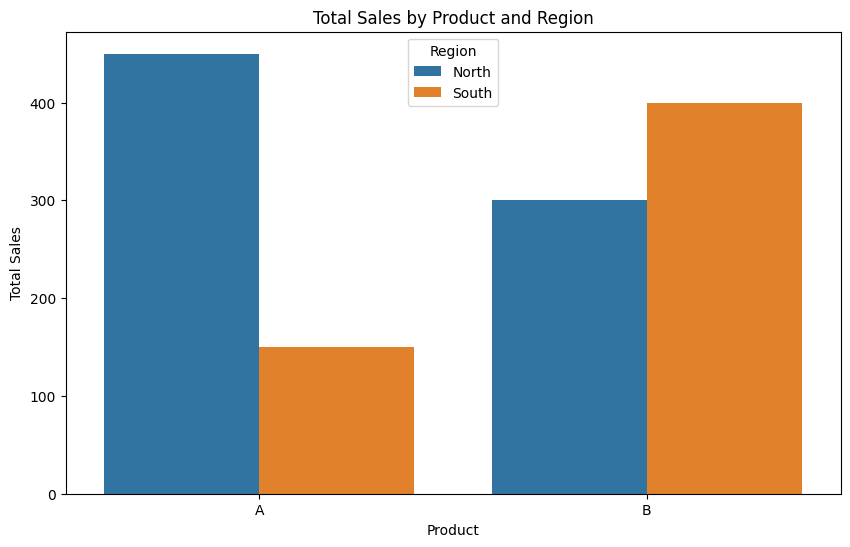

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03'],
    'Product': ['A', 'B', 'A', 'B', 'A'],
    'Region': ['North', 'North', 'South', 'South', 'North'],
    'Sales': [200, 300, 150, 400, 250],
    'Quantity': [5, 10, 3, 8, 7]
}

sales = pd.DataFrame(data)

# Convert 'Date' to datetime object
sales['Date'] = pd.to_datetime(sales['Date'])

# Task a
product_group = sales.groupby('Product').agg(
    Total_Sales=('Sales', 'sum'),
    Average_Quantity=('Quantity', 'mean')
).reset_index()

print(product_group)

# Task b
product_region_group = sales.groupby(['Product', 'Region']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

print(product_region_group)

# Task c
monthly_sales = sales.resample('ME', on='Date').agg(Total_Sales=('Sales', 'sum')).reset_index()

print(monthly_sales)

# Task d
# Bar plot for Total Sales by Product and Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total_Sales', hue='Region', data=product_region_group)
plt.title('Total Sales by Product and Region')
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.show()

  Department   Mean_Salary  Median_Salary   Std_Salary  Mean_Experience  \
0    Finance  93000.000000        94000.0  2645.751311        11.000000   
1         HR  62333.333333        62000.0  2516.611478         3.333333   
2         IT  78333.333333        80000.0  7637.626158         7.000000   

   Median_Experience  Std_Experience  
0               11.0        1.000000  
1                3.0        1.527525  
2                7.0        1.000000  
  Department  Age  Min_Salary  Max_Salary
0    Finance   38       94000       94000
1    Finance   40       95000       95000
2    Finance   45       90000       90000
3         HR   25       60000       60000
4         HR   26       62000       62000
5         HR   30       65000       65000
6         IT   28       70000       70000
7         IT   32       85000       85000
8         IT   35       80000       80000
  Department Experience_Level  Total_Salary  Average_Salary
0    Finance           Senior        279000         93000.0
1  

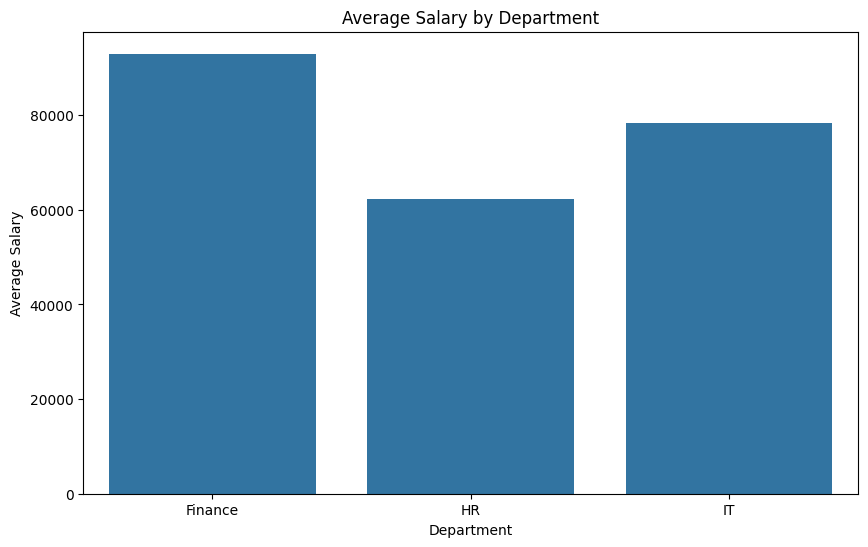

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Department': ['HR', 'HR', 'IT', 'IT', 'Finance', 'Finance', 'IT', 'HR', 'Finance'],
    'Salary': [60000, 65000, 80000, 70000, 90000, 95000, 85000, 62000, 94000],
    'Age': [25, 30, 35, 28, 45, 40, 32, 26, 38],
    'Experience': [2, 5, 8, 6, 10, 12, 7, 3, 11]
}

employee_data = pd.DataFrame(data)

# Task a
dept_stats = employee_data.groupby('Department').agg(
    Mean_Salary=('Salary', 'mean'),
    Median_Salary=('Salary', 'median'),
    Std_Salary=('Salary', 'std'),
    Mean_Experience=('Experience', 'mean'),
    Median_Experience=('Experience', 'median'),
    Std_Experience=('Experience', 'std')
).reset_index()

print(dept_stats)

# Task b
salary_range = employee_data.groupby(['Department', 'Age']).agg(
    Min_Salary=('Salary', 'min'),
    Max_Salary=('Salary', 'max')
).reset_index()

print(salary_range)

# Define experience levels based on Experience years
def experience_level(experience):
    if experience < 3:
        return 'Junior'
    elif experience < 8:
        return 'Mid'
    else:
        return 'Senior'

# Apply the function to create a new column for Experience Level
employee_data['Experience_Level'] = employee_data['Experience'].apply(experience_level)

# Task c
salary_by_experience = employee_data.groupby(['Department', 'Experience_Level']).agg(
    Total_Salary=('Salary', 'sum'),
    Average_Salary=('Salary', 'mean')
).reset_index()

print(salary_by_experience)

# Task d - Visualizations
# Bar plot for Average Salary by Department
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Mean_Salary', data=dept_stats)
plt.title('Average Salary by Department')
plt.ylabel('Average Salary')
plt.xlabel('Department')
plt.show()


Rows with missing values:
      Name  Math_Score  Science_Score  English_Score
0    Alice        85.0            NaN           78.0
1      Bob         NaN           88.0           82.0
2  Charlie        78.0           85.0            NaN
4      Eva         NaN           87.0           91.0

DataFrame after filling missing values:
      Name  Math_Score  Science_Score  English_Score
0    Alice        85.0           87.5           78.0
1      Bob        85.0           88.0           82.0
2  Charlie        78.0           85.0            NaN
3    David        92.0           90.0           90.0
4      Eva        85.0           87.0           91.0

DataFrame after interpolating missing values in English_Score:
      Name  Math_Score  Science_Score  English_Score
0    Alice        85.0           87.5           78.0
1      Bob        85.0           88.0           82.0
2  Charlie        78.0           85.0           86.0
3    David        92.0           90.0           90.0
4      Eva        85.

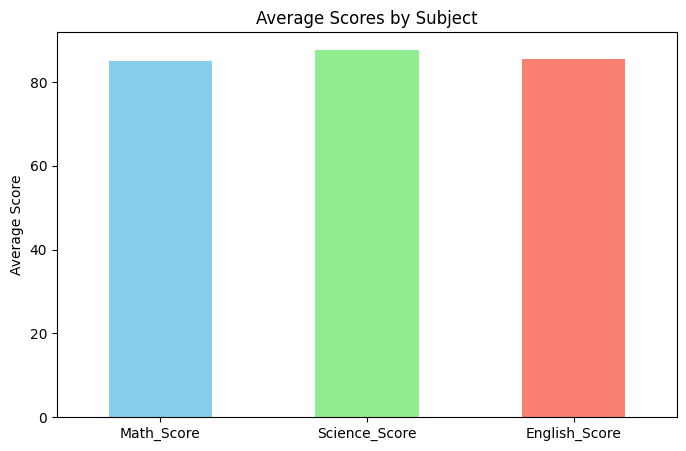

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Math_Score': [85, np.nan, 78, 92, np.nan],
    'Science_Score': [np.nan, 88, 85, 90, 87],
    'English_Score': [78, 82, np.nan, 90, 91]
}

student_scores = pd.DataFrame(data)

# Task a: Identify the rows where there are missing values
missing_values = student_scores[student_scores.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values)

# Task b: Fill missing values
mean_math = student_scores['Math_Score'].mean()
median_science = student_scores['Science_Score'].median()

student_scores['Math_Score'] = student_scores['Math_Score'].fillna(mean_math)
student_scores['Science_Score'] = student_scores['Science_Score'].fillna(median_science)

print("\nDataFrame after filling missing values:")
print(student_scores)

# Task c: Interpolate missing values in English_Score using a linear method
student_scores['English_Score'] = student_scores['English_Score'].interpolate(method='linear')

print("\nDataFrame after interpolating missing values in English_Score:")
print(student_scores)

# Task d - Visualizations
# Calculate average scores
average_scores = student_scores[['Math_Score', 'Science_Score', 'English_Score']].mean()

# Bar plot for average scores
plt.figure(figsize=(8, 5))
average_scores.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Scores by Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()


Data after removing rows with more than two missing values:
   CustomerID   OrderDate  Amount  Discount
0           1  2024-01-01   100.0      10.0
1           2  2024-01-02   150.0       NaN
2           3        None     NaN       5.0
3           4  2024-01-04   200.0      15.0
4           5  2024-01-05   250.0       NaN

Data after filling missing values:
   CustomerID   OrderDate  Amount  Discount
0           1  2024-01-01   100.0      10.0
1           2  2024-01-02   150.0       5.0
2           3        None   150.0       5.0
3           4  2024-01-04   200.0      15.0
4           5  2024-01-05   250.0       5.0


<ipython-input-12-7e2b34941611>:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customer_data_cleaned['Amount'] = customer_data_cleaned['Amount'].fillna(method='ffill')


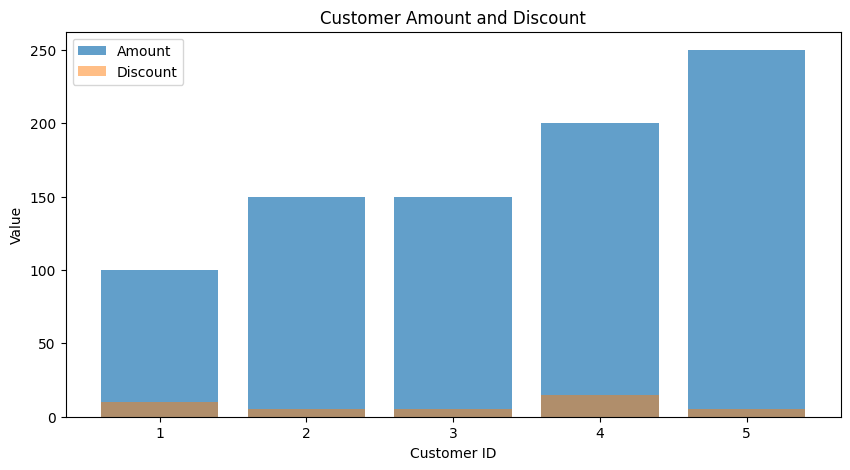

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for customer_data
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'OrderDate': ['2024-01-01', '2024-01-02', None, '2024-01-04', '2024-01-05'],
    'Amount': [100, 150, np.nan, 200, 250],
    'Discount': [10, None, 5, 15, None]
}

customer_data = pd.DataFrame(data)

# Task a: Remove any rows where more than two values are missing
customer_data_cleaned = customer_data.dropna(thresh=len(customer_data.columns) - 2)
print("Data after removing rows with more than two missing values:")
print(customer_data_cleaned)

# Task b: Fill missing Discount values with a fixed rate of 5%
customer_data_cleaned['Discount'] = customer_data_cleaned['Discount'].fillna(5)

# Task c: Use forward fill method for missing Amount values
customer_data_cleaned['Amount'] = customer_data_cleaned['Amount'].fillna(method='ffill')
print("\nData after filling missing values:")
print(customer_data_cleaned)

# Task d: Plotting the Amount and Discount
plt.figure(figsize=(10, 5))
plt.bar(customer_data_cleaned['CustomerID'], customer_data_cleaned['Amount'], label='Amount', alpha=0.7)
plt.bar(customer_data_cleaned['CustomerID'], customer_data_cleaned['Discount'], label='Discount', alpha=0.5)
plt.title('Customer Amount and Discount')
plt.xlabel('Customer ID')
plt.ylabel('Value')
plt.legend()
plt.show()


Percentage of missing values for each column:
Date           20.0
Temperature    20.0
Humidity       20.0
WindSpeed      20.0
dtype: float64

Data after filling humidity values:
        Date  Temperature  Humidity  WindSpeed    Weekday
0 2024-01-01         22.0      50.0        5.0     Monday
1 2024-01-02         23.0       NaN        6.0    Tuesday
2 2024-01-03         24.0      55.0        7.0  Wednesday
3 2024-01-04         24.0      60.0        NaN   Thursday


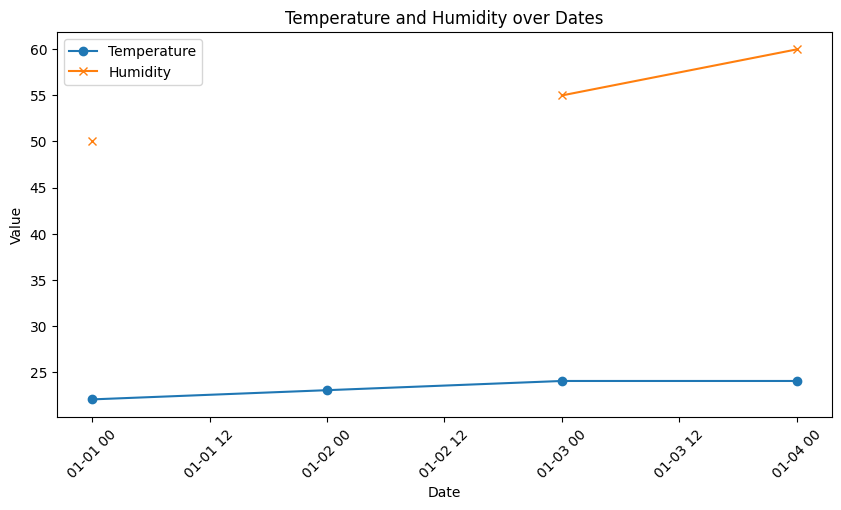

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for weather_data
weather_data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', None],
    'Temperature': [22, 23, np.nan, 24, 25],
    'Humidity': [50, np.nan, 55, 60, 65],
    'WindSpeed': [5, 6, 7, None, 9]
}

weather_data = pd.DataFrame(weather_data)

# Task a: Detect missing values and calculate the percentage of missing values for each column
missing_percentage = weather_data.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

# Task b: Remove rows with missing values in the Date column
weather_data_cleaned = weather_data.dropna(subset=['Date']).copy()  # Create a copy to avoid warnings

# Backward fill for Temperature missing values
weather_data_cleaned['Temperature'] = weather_data_cleaned['Temperature'].bfill()

# Task c: Fill missing values in Humidity using average by the day of the week
weather_data_cleaned['Date'] = pd.to_datetime(weather_data_cleaned['Date'])

# Using .loc to avoid SettingWithCopyWarning
weather_data_cleaned.loc[:, 'Weekday'] = weather_data_cleaned['Date'].dt.day_name()
average_humidity = weather_data_cleaned.groupby('Weekday')['Humidity'].transform('mean')

# Fill missing Humidity with average humidity of the day of the week
weather_data_cleaned.loc[:, 'Humidity'] = weather_data_cleaned['Humidity'].fillna(average_humidity)

print("\nData after filling humidity values:")
print(weather_data_cleaned)

# Task d: Plotting Temperature and Humidity
plt.figure(figsize=(10, 5))
plt.plot(weather_data_cleaned['Date'], weather_data_cleaned['Temperature'], label='Temperature', marker='o')
plt.plot(weather_data_cleaned['Date'], weather_data_cleaned['Humidity'], label='Humidity', marker='x')
plt.title('Temperature and Humidity over Dates')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()



Summary by Category:
  Category  Mean_Sales  Sum_Sales  Mean_Discount  Sum_Discount
0        A       175.0      350.0           15.0          45.0
1        B       175.0      350.0           20.0          20.0

Total Sales per Month:
     Month  Sales
0  2024-01  625.0


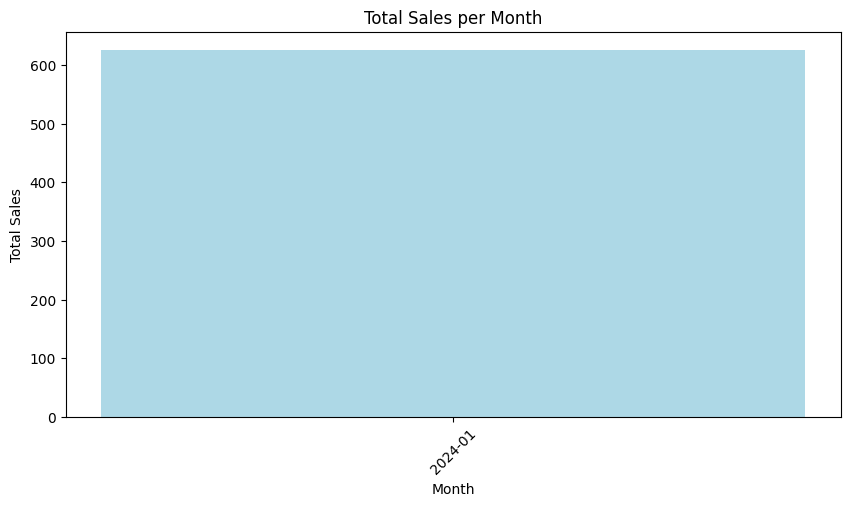

In [ ]:
# Sample data for sales_data
sales_data = {
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-03', None],
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Sales': [100, 150, np.nan, 200, 250],
    'Discount': [10, 20, 5, None, 30]
}

sales_data = pd.DataFrame(sales_data)

# Task a: Group by Category and find mean and sum of Sales and Discount
category_summary = sales_data.groupby('Category').agg(
    Mean_Sales=('Sales', 'mean'),
    Sum_Sales=('Sales', 'sum'),
    Mean_Discount=('Discount', 'mean'),
    Sum_Discount=('Discount', 'sum')
).reset_index()
print("\nSummary by Category:")
print(category_summary)

# Task b: Replace missing values in Sales using the mean for each Category
sales_data['Sales'] = sales_data.groupby('Category')['Sales'].transform(lambda x: x.fillna(x.mean()))

# Task c: Group by month and year, then calculate total Sales per month
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.to_period('M')
monthly_sales = sales_data.groupby('Month')['Sales'].sum().reset_index()
print("\nTotal Sales per Month:")
print(monthly_sales)

# Task d: Plotting Total Sales per Month
plt.figure(figsize=(10, 5))
plt.bar(monthly_sales['Month'].astype(str), monthly_sales['Sales'], color='lightblue')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'FullName': ['John Doe', 'Jane Smith', 'Alice Johnson'],
    'Email': ['john.doe@example.com', 'jane.smith@example.com', 'alice.johnson@example.com'],
    'Phone': ['123-456-7890', '987-654-3210', '555-555-5555']
}

customer_info = pd.DataFrame(data)

# a) Extract first name and last name
customer_info[['FirstName', 'LastName']] = customer_info['FullName'].str.split(' ', n=1, expand=True)

# b) Replace .com with .org in Email
customer_info['Email'] = customer_info['Email'].str.replace('.com', '.org', regex=False)

# c) Ensure names start with uppercase
customer_info['FirstName'] = customer_info['FirstName'].str.capitalize()
customer_info['LastName'] = customer_info['LastName'].str.capitalize()

print(customer_info)



        FullName                      Email         Phone FirstName LastName
0       john doe       john.doe@example.org  123-456-7890      John      Doe
1     jane smith     jane.smith@example.org  987-654-3210      Jane    Smith
2  alice johnson  alice.johnson@example.org  555-555-5555     Alice  Johnson


In [ ]:
# Sample DataFrame
data = {
    'Product_ID': [1, 2, 3],
    'Category': [' Electronics ', ' Appliances ', 'Furniture '],
    'Description': ['High quality premium TV', 'Standard fridge', 'Premium wooden chair']
}

product_details = pd.DataFrame(data)

# a) Check if "premium" exists in Description
product_details['Is_Premium'] = product_details['Description'].str.contains('premium', case=False)

# b) Remove leading and trailing whitespace
product_details['Category'] = product_details['Category'].str.strip()
product_details['Description'] = product_details['Description'].str.strip()

# c) Concatenate Category and Product_ID into Product_Code
product_details['Product_Code'] = (product_details['Category'] + '-' + product_details['Product_ID'].astype(str)).str.upper()

print(product_details)


   Product_ID     Category              Description  Is_Premium   Product_Code
0           1  Electronics  High quality premium TV        True  ELECTRONICS-1
1           2   Appliances          Standard fridge       False   APPLIANCES-2
2           3    Furniture     Premium wooden chair        True    FURNITURE-3


In [ ]:
# Sample DataFrame
data = {
    'Emp_ID': ['Emp001', 'Emp002', 'Emp003'],
    'Department': ['HR', 'IT', 'Finance'],
    'Comments': ['urgent meeting tomorrow', 'on leave', 'urgent project deadline']
}

employee_data = pd.DataFrame(data)

# a) Extract numerical ID from Emp_ID
employee_data['Numeric_ID'] = employee_data['Emp_ID'].str.extract('(\d+)')

# b) Find rows with "urgent" in Comments
urgent_comments = employee_data[employee_data['Comments'].str.contains('urgent', case=False)]

# c) Replace "on leave" with "on vacation"
employee_data['Comments'] = employee_data['Comments'].str.replace('on leave', 'on vacation', case=False)

print(employee_data)
print("\nUrgent Comments:")
print(urgent_comments)


   Emp_ID Department                 Comments Numeric_ID
0  Emp001         HR  urgent meeting tomorrow        001
1  Emp002         IT              on vacation        002
2  Emp003    Finance  urgent project deadline        003

Urgent Comments:
   Emp_ID Department                 Comments Numeric_ID
0  Emp001         HR  urgent meeting tomorrow        001
2  Emp003    Finance  urgent project deadline        003


   Response_ID Respondent_Name                  Feedback Initials  \
0            1        John Doe     great service overall       JD   
1            2      Jane Smith  service was satisfactory       JS   
2            3   Alice Johnson              bad service!       AJ   

   Service_Count  
0              1  
1              1  
2              1  


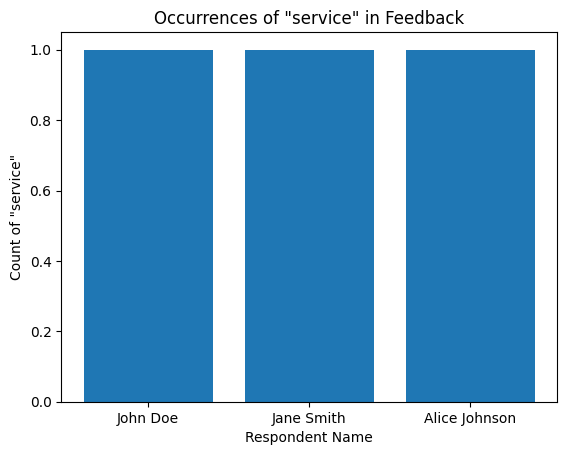

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Response_ID': [1, 2, 3],
    'Respondent_Name': ['John Doe', 'Jane Smith', 'Alice Johnson'],
    'Feedback': ['Great service overall', 'Service was satisfactory', 'Bad   service!']
}

survey_data = pd.DataFrame(data)

# a) Create a new column called Initials
survey_data['Initials'] = survey_data['Respondent_Name'].apply(lambda x: ''.join([name[0].upper() for name in x.split()]))

# b) Format Feedback to lowercase and count occurrences of "service"
survey_data['Feedback'] = survey_data['Feedback'].str.lower()
survey_data['Service_Count'] = survey_data['Feedback'].str.count('service')

# c) Replace multiple spaces with a single space in Feedback
survey_data['Feedback'] = survey_data['Feedback'].str.replace(r'\s+', ' ', regex=True)

print(survey_data)

# d) Displaying a simple bar chart for service occurrences
import matplotlib.pyplot as plt

plt.bar(survey_data['Respondent_Name'], survey_data['Service_Count'])
plt.xlabel('Respondent Name')
plt.ylabel('Count of "service"')
plt.title('Occurrences of "service" in Feedback')
plt.show()


   Response_ID Respondent_Name                  Feedback Initials  \
0            1        John Doe     great service overall       JD   
1            2      Jane Smith  service was satisfactory       JS   
2            3   Alice Johnson              bad service!       AJ   

   Service_Count  
0              1  
1              1  
2              1  


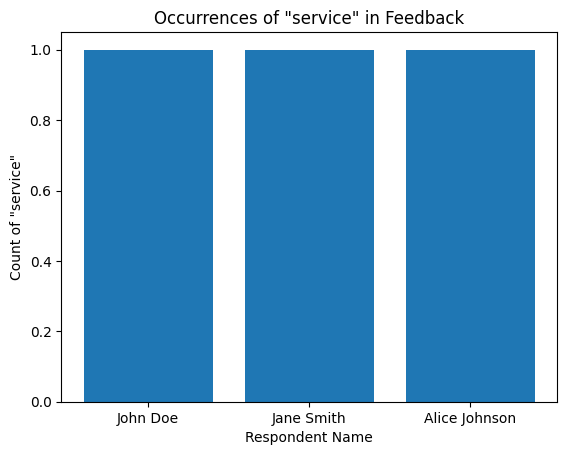

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Response_ID': [1, 2, 3],
    'Respondent_Name': ['John Doe', 'Jane Smith', 'Alice Johnson'],
    'Feedback': ['Great service overall', 'Service was satisfactory', 'Bad   service!']
}

survey_data = pd.DataFrame(data)

# a) Create a new column called Initials
survey_data['Initials'] = survey_data['Respondent_Name'].apply(lambda x: ''.join([name[0].upper() for name in x.split()]))

# b) Format Feedback to lowercase and count occurrences of "service"
survey_data['Feedback'] = survey_data['Feedback'].str.lower()
survey_data['Service_Count'] = survey_data['Feedback'].str.count('service')

# c) Replace multiple spaces with a single space in Feedback
survey_data['Feedback'] = survey_data['Feedback'].str.replace(r'\s+', ' ', regex=True)

print(survey_data)

# d) Displaying a simple bar chart for service occurrences
import matplotlib.pyplot as plt

plt.bar(survey_data['Respondent_Name'], survey_data['Service_Count'])
plt.xlabel('Respondent Name')
plt.ylabel('Count of "service"')
plt.title('Occurrences of "service" in Feedback')
plt.show()


   Order_ID Product_Name       Customer_Comments First_Word
0       101        Apple    Great promo on this!      Great
1       102       Banana       Service was great    Service
2       103       Cherry  promo available   now!      Promo


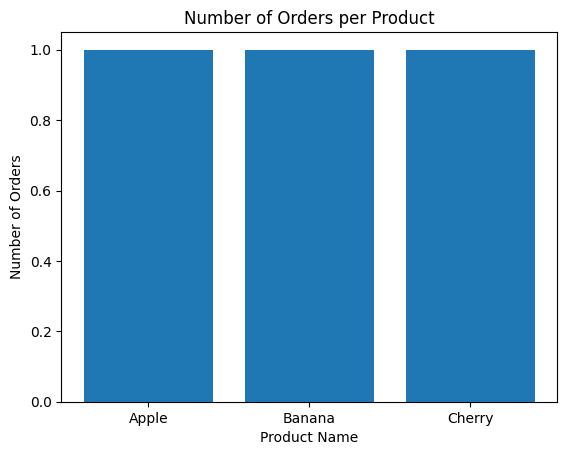

In [ ]:
# Sample DataFrame
data = {
    'Order_ID': [101, 102, 103],
    'Product_Name': ['   Apple   ', 'Banana ', 'Cherry '],
    'Customer_Comments': ['Great discount on this!', 'Service was great', 'Discount available   now!']
}

order_data = pd.DataFrame(data)

# a) Remove extra whitespace
order_data['Product_Name'] = order_data['Product_Name'].str.strip()
order_data['Customer_Comments'] = order_data['Customer_Comments'].str.strip()

# b) Replace "discount" with "promo" in Customer_Comments
order_data['Customer_Comments'] = order_data['Customer_Comments'].str.replace('discount', 'promo', case=False)

# c) Extract the first word from Customer_Comments and change to title case
order_data['First_Word'] = order_data['Customer_Comments'].str.split().str[0].str.title()

print(order_data)

# d) Displaying a bar chart for the number of orders per product
product_counts = order_data['Product_Name'].value_counts()

plt.bar(product_counts.index, product_counts.values)
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Product')
plt.show()
